In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = 'svg'

In [2]:
print(f"pandas  version: {pd.__version__}")
print(f"numpy   version: {np.__version__}")
print(f"seaborn version: {sns.__version__}")

pandas  version: 1.4.4
numpy   version: 1.21.5
seaborn version: 0.11.2


In [3]:
df = pd.read_excel("decisiontreeExcel.xlsx")
df.sample(133)

,Number,CB_IR_Test,CB_IR_Wi,CB_ConT_Test,CB_ConT_Wi,CB_CR_Test,CB_CR_Wi,CB_SF6Press_Test,CB_SF6Press_Wi,CB_SF6Dew_Test,...,LA_IP_Test,LA_IP_Wi,LA_Fas_Test,LA_Fas_Wi,LA_UC_Test,LA_UC_Wi,LA_Ter_Test,LA_Ter_Wi,HI_Total,Assessment
7,8,10,10,30.000000,10,0,10,10.0,10,-10.0,...,1,16.666667,0,16.666667,0,16.666667,0,16.666667,92.902778,High
122,123,10,10,0.000000,10,0,10,5.2,10,-10.0,...,1,16.666667,0,16.666667,1,16.666667,1,16.666667,77.708333,Medium
115,116,10,10,0.000000,10,0,10,5.2,10,-10.0,...,1,16.666667,1,16.666667,1,16.666667,1,16.666667,79.527778,Medium
28,29,10,10,0.000000,10,0,10,10.0,10,-10.0,...,1,16.666667,0,16.666667,0,16.666667,0,16.666667,98.000000,High
27,28,10,10,0.000000,10,0,10,5.1,10,-10.0,...,1,16.666667,0,16.666667,1,16.666667,0,16.666667,92.625000,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,97,70,10,0.052632,10,0,10,6.8,10,-10.0,...,1,16.666667,0,16.666667,0,16.666667,0,16.666667,100.000000,High
88,89,10,10,0.000000,10,0,10,6.7,10,-10.0,...,1,16.666667,0,16.666667,0,16.666667,0,16.666667,100.000000,High
125,126,10,10,55.000000,10,0,10,6.6,10,-10.0,...,1,16.666667,1,16.666667,1,16.666667,1,16.666667,74.152778,Medium
32,33,10,10,0.000000,10,0,10,10.0,10,-10.0,...,1,16.666667,1,16.666667,0,16.666667,0,16.666667,95.625000,High


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 89 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            133 non-null    int64  
 1   CB_IR_Test        133 non-null    int64  
 2   CB_IR_Wi          133 non-null    int64  
 3   CB_ConT_Test      133 non-null    float64
 4   CB_ConT_Wi        133 non-null    int64  
 5   CB_CR_Test        133 non-null    int64  
 6   CB_CR_Wi          133 non-null    int64  
 7   CB_SF6Press_Test  133 non-null    float64
 8   CB_SF6Press_Wi    133 non-null    int64  
 9   CB_SF6Dew_Test    133 non-null    float64
 10  CB_SF6Dew_Wi      133 non-null    int64  
 11  CB_SF6_Test       133 non-null    int64  
 12  CB_SF6_Wi         133 non-null    int64  
 13  CB_SF6Pur_Test    133 non-null    int64  
 14  CB_SF6Pur_Wi      133 non-null    int64  
 15  CB_SO2_Test       133 non-null    int64  
 16  CB_SO2_Wi         133 non-null    int64  
 1

In [5]:
df.columns

Index(['Number', 'CB_IR_Test', 'CB_IR_Wi', 'CB_ConT_Test', 'CB_ConT_Wi',
       'CB_CR_Test', 'CB_CR_Wi', 'CB_SF6Press_Test', 'CB_SF6Press_Wi',
       'CB_SF6Dew_Test', 'CB_SF6Dew_Wi', 'CB_SF6_Test', 'CB_SF6_Wi',
       'CB_SF6Pur_Test', 'CB_SF6Pur_Wi', 'CB_SO2_Test', 'CB_SO2_Wi',
       'CB_Vis_Test', 'CB_Vis_Wi', 'CB_Gas_Test', 'CB_Gas_Wi', 'CT_CR_Test',
       'CT_CR_Wi', 'CT_IR_Test', 'CT_IR_Wi', 'CT_IP_Test', 'CT_IP_Wi',
       'CT_Turn_Test', 'CT_Turn_Wi', 'CT_Break_Test', 'CT_Break_Wi',
       'CT_Water_Test', 'CT_Water_Wi', 'CT_Fas_Test', 'CT_Fas_Wi',
       'CT_UC_Test', 'CT_UC_Wi', 'CT_Ter_Test', 'CT_Ter_Wi', 'CT_Oil_Test',
       'CT_Oil_Wi', 'PT_CR_Test', 'PT_CR_Wi', 'PT_IR_Test', 'PT_IR_Wi',
       'PT_IP_Test', 'PT_IP_Wi', 'PT_Turn_Test', 'PT_Turn _Wi',
       'PT_Break_Test', 'PT_Break_Wi', 'PT_Fas_Test', 'PT_Fas_Wi',
       'PT_UC_Test', 'PT_UC_Wi', 'PT_Ter_Test', 'PT_Ter_Wi', 'PT_Oil_Test',
       'PT_Oil_Wi', 'DS_CR_Test', 'DS_CR_Wi', 'DS_IR_Test', 'DS_IR_Wi',
       

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix,
    plot_confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    precision_recall_fscore_support,
    f1_score,
)

In [7]:
df.columns

Index(['Number', 'CB_IR_Test', 'CB_IR_Wi', 'CB_ConT_Test', 'CB_ConT_Wi',
       'CB_CR_Test', 'CB_CR_Wi', 'CB_SF6Press_Test', 'CB_SF6Press_Wi',
       'CB_SF6Dew_Test', 'CB_SF6Dew_Wi', 'CB_SF6_Test', 'CB_SF6_Wi',
       'CB_SF6Pur_Test', 'CB_SF6Pur_Wi', 'CB_SO2_Test', 'CB_SO2_Wi',
       'CB_Vis_Test', 'CB_Vis_Wi', 'CB_Gas_Test', 'CB_Gas_Wi', 'CT_CR_Test',
       'CT_CR_Wi', 'CT_IR_Test', 'CT_IR_Wi', 'CT_IP_Test', 'CT_IP_Wi',
       'CT_Turn_Test', 'CT_Turn_Wi', 'CT_Break_Test', 'CT_Break_Wi',
       'CT_Water_Test', 'CT_Water_Wi', 'CT_Fas_Test', 'CT_Fas_Wi',
       'CT_UC_Test', 'CT_UC_Wi', 'CT_Ter_Test', 'CT_Ter_Wi', 'CT_Oil_Test',
       'CT_Oil_Wi', 'PT_CR_Test', 'PT_CR_Wi', 'PT_IR_Test', 'PT_IR_Wi',
       'PT_IP_Test', 'PT_IP_Wi', 'PT_Turn_Test', 'PT_Turn _Wi',
       'PT_Break_Test', 'PT_Break_Wi', 'PT_Fas_Test', 'PT_Fas_Wi',
       'PT_UC_Test', 'PT_UC_Wi', 'PT_Ter_Test', 'PT_Ter_Wi', 'PT_Oil_Test',
       'PT_Oil_Wi', 'DS_CR_Test', 'DS_CR_Wi', 'DS_IR_Test', 'DS_IR_Wi',
       

In [8]:
cols = [
   "CB_IR_Test",
    "CB_ConT_Test",
    "CB_CR_Test",
    "CB_SF6Press_Test",
    "CB_SF6Dew_Test",
    "CB_SF6_Test",
    "CB_SF6Pur_Test",
    "CB_SO2_Test",
    "CB_Vis_Test",
    "CB_Gas_Test",
    "CT_CR_Test",
    "CT_IR_Test",
    "CT_IP_Test",
    "CT_Turn_Test",
    "CT_Break_Test",
    "CT_Water_Test",
    "CT_Fas_Test",
    "CT_UC_Test",
    "CT_Ter_Test",
    "CT_Oil_Test",
    "PT_CR_Test",
    "PT_IR_Test",
    "PT_IP_Test",
    "PT_Turn_Test",
    "PT_Break_Test",
    "PT_Fas_Test",
    "PT_UC_Test",
    "PT_Ter_Test",
    "PT_Oil_Test",
    "DS_CR_Test",
    "DS_IR_Test",
    "DS_IP_Test",
    "DS_Fas_Test",
    "DS_UC_Test",
    "DS_Func_Test",
    "DS_TTh_Test",
    "DS_Lub_Test",
    "LA_CR_Test",
    "LA_IR_Test",
    "LA_IP_Test",
    "LA_Fas_Test",
    "LA_UC_Test",
    "LA_Ter_Test",
]

In [9]:
X = df[cols]  
y = df["Assessment"]  

In [10]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, stratify=y, random_state=7
)

In [11]:
#เนื่องจากค่าตัวแปรมีทั้งหลักหน่วย สิบ ร้อย พัน,ค่าที่สูง dominate ค่าน้อย จึงต้องทำ
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the trainning data
scaler.fit(X_train)

#Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:

X_train

array([[-0.09759001, -0.57239041, -0.47923625, ..., -0.49705012,
        -0.57008771, -0.40599897],
       [-0.09759001, -0.57270803, -0.47923625, ..., -0.49705012,
        -0.57008771, -0.40599897],
       [-0.09759001,  1.84760634, -0.47923625, ...,  2.01186954,
        -0.57008771, -0.40599897],
       ...,
       [-0.09759001,  1.73235544, -0.47923625, ...,  2.01186954,
         1.75411604,  2.46306043],
       [-0.09759001, -0.57266265, -0.47923625, ..., -0.49705012,
        -0.57008771, -0.40599897],
       [-0.09759001,  1.61710453, -0.47923625, ..., -0.49705012,
        -0.57008771, -0.40599897]])

In [13]:
X_train = pd.DataFrame(X_train, columns = X.columns)

X_test = pd.DataFrame(X_test, columns=X.columns)

In [14]:
model = DecisionTreeClassifier(criterion="gini")  # gini is a default
# model=DecisionTreeClassifier(criterion='entropy')

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
model = DecisionTreeClassifier(criterion="gini")  # gini is a default
# model=DecisionTreeClassifier(criterion='entropy')

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
X_train.columns

Index(['CB_IR_Test', 'CB_ConT_Test', 'CB_CR_Test', 'CB_SF6Press_Test',
       'CB_SF6Dew_Test', 'CB_SF6_Test', 'CB_SF6Pur_Test', 'CB_SO2_Test',
       'CB_Vis_Test', 'CB_Gas_Test', 'CT_CR_Test', 'CT_IR_Test', 'CT_IP_Test',
       'CT_Turn_Test', 'CT_Break_Test', 'CT_Water_Test', 'CT_Fas_Test',
       'CT_UC_Test', 'CT_Ter_Test', 'CT_Oil_Test', 'PT_CR_Test', 'PT_IR_Test',
       'PT_IP_Test', 'PT_Turn_Test', 'PT_Break_Test', 'PT_Fas_Test',
       'PT_UC_Test', 'PT_Ter_Test', 'PT_Oil_Test', 'DS_CR_Test', 'DS_IR_Test',
       'DS_IP_Test', 'DS_Fas_Test', 'DS_UC_Test', 'DS_Func_Test',
       'DS_TTh_Test', 'DS_Lub_Test', 'LA_CR_Test', 'LA_IR_Test', 'LA_IP_Test',
       'LA_Fas_Test', 'LA_UC_Test', 'LA_Ter_Test'],
      dtype='object')

In [17]:
model.feature_importances_

array([0.        , 0.        , 0.04867719, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.74817959, 0.        , 0.        , 0.15238078,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05076243])

In [18]:
fs = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(
    ascending=False
)
fs

PT_UC_Test          0.748180
DS_CR_Test          0.152381
LA_Ter_Test         0.050762
CB_CR_Test          0.048677
DS_Fas_Test         0.000000
PT_Break_Test       0.000000
PT_Fas_Test         0.000000
PT_Ter_Test         0.000000
PT_Oil_Test         0.000000
DS_IR_Test          0.000000
DS_IP_Test          0.000000
DS_UC_Test          0.000000
PT_IP_Test          0.000000
DS_Func_Test        0.000000
DS_TTh_Test         0.000000
DS_Lub_Test         0.000000
LA_CR_Test          0.000000
LA_IR_Test          0.000000
LA_IP_Test          0.000000
LA_Fas_Test         0.000000
LA_UC_Test          0.000000
PT_Turn_Test        0.000000
CB_IR_Test          0.000000
CB_ConT_Test        0.000000
PT_CR_Test          0.000000
CB_SF6Press_Test    0.000000
CB_SF6Dew_Test      0.000000
CB_SF6_Test         0.000000
CB_SF6Pur_Test      0.000000
CB_SO2_Test         0.000000
CB_Vis_Test         0.000000
CB_Gas_Test         0.000000
CT_CR_Test          0.000000
CT_IR_Test          0.000000
CT_IP_Test    

In [19]:
y_train.value_counts()

High      82
Medium    19
low        5
Name: Assessment, dtype: int64

In [20]:
clf = DecisionTreeClassifier(criterion="gini")
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
clf.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['CB_IR_Test', 'CB_ConT_Test', 'CB_CR_Test', 'CB_SF6Press_Test',
        'CB_SF6Dew_Test', 'CB_SF6_Test', 'CB_SF6Pur_Test', 'CB_SO2_Test',
        'CB_Vis_Test', 'CB_Gas_Test', 'CT_CR_Test', 'CT_IR_Test',
        'CT_IP_Test', 'CT_Turn_Test', 'CT_Break_Test', 'CT_Water_Test',
        'CT_Fas_Test', 'CT_UC_Test', 'CT_Ter_Test', 'CT_Oil_Test',
        'PT_CR_Test', 'PT_IR_Test', 'PT_IP_Test', 'PT_Turn_Test',
        'PT_Break_Test', 'PT_Fas_Test', 'PT_UC_Test', 'PT_Ter_Test',
        'PT_Oil_Test', 'DS_CR_Test', 'DS_IR_Test', 'DS_IP_Test',
        'DS_Fas_Test', 'DS_UC_Test', 'DS_Func_Test', 'DS_TTh_Test',
        'DS_Lub_Test', 'LA_CR_Test', 'LA_IR_Test', 'LA_IP_Test',
     

In [22]:
clf.__dict__["tree_"]

In [23]:
type(clf)

sklearn.tree._classes.DecisionTreeClassifier

In [24]:
clf.__dict__["classes_"]

array(['High', 'Medium', 'low'], dtype=object)

In [25]:
from sklearn.tree import export_graphviz
from graphviz import Digraph, Source


def view_tree(model, X, save_tree_img=False):
    estimators = clf
    dot_graph = export_graphviz(
        estimators,
        feature_names=X.columns,
        class_names=model.__dict__["classes_"],
        rounded=True,
        proportion=False,
        precision=2,
        filled=True,
    )
    #     with open(f'tree{tree_index}.dot') as f:
    #         dot_graph = f.read()
    g = Source(dot_graph)
    if save_tree_img:
        g.render(f"tree", format="png", view=False, cleanup=True)
    return g

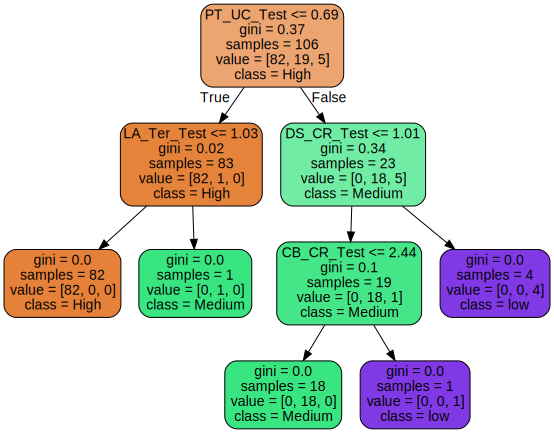

In [26]:
view_tree(clf, X_test, save_tree_img=False)

In [28]:
cm = confusion_matrix(y_test, model.predict(X_test))
cm

array([[21,  0,  0],
       [ 2,  3,  0],
       [ 0,  0,  1]], dtype=int64)

In [75]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

        High       0.95      1.00      0.98       103
      Medium       0.00      0.00      0.00        24
         low       0.24      1.00      0.39         6

    accuracy                           0.82       133
   macro avg       0.40      0.67      0.45       133
weighted avg       0.75      0.82      0.77       133



C:\Users\Desktop\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desktop\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Desktop\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
model.tree_.impurity  # gini

array([0.36721253, 0.02380607, 0.        , 0.        , 0.34026465,
       0.09972299, 0.        , 0.        , 0.        ])

In [77]:
model.tree_.value

array([[[82., 19.,  5.]],

       [[82.,  1.,  0.]],

       [[82.,  0.,  0.]],

       [[ 0.,  1.,  0.]],

       [[ 0., 18.,  5.]],

       [[ 0., 18.,  1.]],

       [[ 0., 18.,  0.]],

       [[ 0.,  0.,  1.]],

       [[ 0.,  0.,  4.]]])

In [78]:
predicted = model.predict(X_test)
predicted

array(['Medium', 'High', 'Medium', 'Medium', 'High', 'High', 'High',
       'High', 'High', 'High', 'low', 'High', 'High', 'High', 'Medium',
       'Medium', 'High', 'High', 'High', 'High', 'High', 'High', 'High',
       'High', 'High', 'High', 'High'], dtype=object)

In [82]:
pd.crosstab(y_test, predicted)

col_0,High,Medium,low
Assessment,,,
High,21,0,0
Medium,0,5,0
low,0,0,1
